<a href="https://colab.research.google.com/github/dyi-el/optimized-traffic-light-computer-vision/blob/main/notebooks/yolov8cls-train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Train YOLOv8 Classification Traffic Density

---

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Apr 16 07:03:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!pip install roboflow --quiet
from getpass import getpass
from roboflow import Roboflow

secret = getpass('Enter the API KEY: ')
rf = Roboflow(api_key=secret)
project = rf.workspace("dyiel").project("traffic-density-4k")
version = project.version(2)
dataset = version.download("folder")

Enter the API KEY: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to traffic-density-4k-2 in folder:: 100%|██████████| 10486/10486 [00:01<00:00, 6014.33it/s]


## Custom Training

In [8]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=100 imgsz=128 lr0=0.001 batch=32

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/traffic-density-4k-2, epochs=100, time=None, patience=100, batch=32, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

In [15]:
# Load a model
model = YOLO('/content/runs/classify/train2/weights/last.pt')  # load a partially trained model

# Resume training
results = model.train(resume=True)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/content/runs/classify/train2/weights/last.pt, data=/content/traffic-density-4k-2, epochs=100, time=None, patience=100, batch=32, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/runs/classify/train2/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

train: Scanning /content/traffic-density-4k-2/train... 9150 images, 0 corrupt: 100%|██████████| 9150/9150 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/traffic-density-4k-2/test... 443 images, 0 corrupt: 100%|██████████| 443/443 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Resuming training /content/runs/classify/train2/weights/last.pt from epoch 43 to 100 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.419G    0.04361         30        128: 100%|██████████| 286/286 [00:38<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.82it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.398G    0.04064         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.61it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.398G    0.03675         30        128: 100%|██████████| 286/286 [00:35<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.398G     0.0402         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.91it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.398G    0.03895         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.29it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.398G    0.03383         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.39it/s]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.398G    0.03032         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.82it/s]

                   all      0.946          1

      Epoch    GPU_mem       loss  Instances       Size



     50/100     0.398G    0.02809         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.47it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.398G    0.03009         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  6.20it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.398G    0.02913         30        128: 100%|██████████| 286/286 [00:34<00:00,  8.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.45it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.398G    0.02169         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.79it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.398G     0.0256         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.61it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.398G    0.02323         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.48it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.398G    0.02125         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.388G    0.02489         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.388G    0.01988         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.53it/s]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.388G    0.02109         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.60it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.388G    0.02384         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.73it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.388G    0.01658         30        128: 100%|██████████| 286/286 [00:34<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.68it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.388G    0.01664         30        128: 100%|██████████| 286/286 [00:32<00:00,  8.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.98it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.388G    0.01901         30        128: 100%|██████████| 286/286 [00:33<00:00,  8.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.15it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.388G    0.02007         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.57it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.388G    0.01601         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.388G    0.01906         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.48it/s]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.388G    0.01378         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.47it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.388G    0.01275         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


                   all      0.948          1

      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.388G    0.01294         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.52it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.388G    0.01047         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.74it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.388G   0.008191         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.38it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.388G    0.01231         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.388G     0.0116         30        128: 100%|██████████| 286/286 [00:35<00:00,  7.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.45it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.388G   0.009709         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.53it/s]


                   all       0.95          1

      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.388G    0.01021         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.94it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.388G   0.006234         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.63it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.388G   0.006366         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.62it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.388G   0.008603         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.06it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.388G    0.00704         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.388G   0.008006         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.08it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.388G   0.007757         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.78it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.388G   0.008459         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.46it/s]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.388G   0.007272         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.35it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.388G    0.01247         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.57it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.388G    0.01912         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.57it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.388G    0.01418         30        128: 100%|██████████| 286/286 [00:35<00:00,  7.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.388G     0.0181         30        128: 100%|██████████| 286/286 [00:36<00:00,  7.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.86it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.388G    0.01828         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  7.50it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.388G    0.01391         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.388G    0.01879         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.39it/s]

                   all      0.944          1



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.388G    0.01924         30        128: 100%|██████████| 286/286 [00:38<00:00,  7.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.23it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.388G    0.01899         30        128: 100%|██████████| 286/286 [00:38<00:00,  7.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.42it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.388G    0.01931         30        128: 100%|██████████| 286/286 [00:38<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 11.12it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.388G    0.01534         30        128: 100%|██████████| 286/286 [00:38<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.62it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.388G    0.01602         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.43it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.388G    0.01597         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.388G    0.01312         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.388G    0.01449         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  9.24it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.388G    0.01614         30        128: 100%|██████████| 286/286 [00:37<00:00,  7.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 10.29it/s]

                   all      0.941          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.388G    0.01508         30        128: 100%|██████████| 286/286 [00:38<00:00,  7.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00,  8.27it/s]

                   all      0.944          1



58 epochs completed in 0.615 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/traffic-density-4k-2/train... found 9150 images in 4 classes ✅ 
val: /content/traffic-density-4k-2/val... found 876 images in 4 classes ✅ 
test: /content/traffic-density-4k-2/test... found 443 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]


                   all      0.953          1
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


In [16]:
!ls -la {HOME}/runs/classify/train2/

total 1488
drwxr-xr-x 3 root root   4096 Apr 16 08:17 .
drwxr-xr-x 5 root root   4096 Apr 16 07:36 ..
-rw-r--r-- 1 root root   1626 Apr 16 07:40 args.yaml
-rw-r--r-- 1 root root 129789 Apr 16 08:17 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 115326 Apr 16 08:17 confusion_matrix.png
-rw-r--r-- 1 root root 134932 Apr 16 07:36 events.out.tfevents.1713251459.abe732231387.3732.0
-rw-r--r-- 1 root root 139774 Apr 16 08:16 events.out.tfevents.1713253257.abe732231387.1555.0
-rw-r--r-- 1 root root  19392 Apr 16 08:17 results.csv
-rw-r--r-- 1 root root 130747 Apr 16 08:17 results.png
-rw-r--r-- 1 root root  65655 Apr 16 07:11 train_batch0.jpg
-rw-r--r-- 1 root root  61163 Apr 16 07:11 train_batch1.jpg
-rw-r--r-- 1 root root  66545 Apr 16 08:11 train_batch25740.jpg
-rw-r--r-- 1 root root  63336 Apr 16 08:11 train_batch25741.jpg
-rw-r--r-- 1 root root  64127 Apr 16 08:11 train_batch25742.jpg
-rw-r--r-- 1 root root  62835 Apr 16 07:11 train_batch2.jpg
-rw-r--r-- 1 root root  66395 Apr 16

In [18]:
!cat {HOME}/runs/classify/train2/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                0.71226,                0.88488,                      1,                0.89209,              0.0033217,              0.0033217,              0.0033217
                      2,                0.34102,                0.92325,                      1,                0.82799,              0.0065891,              0.0065891,              0.0065891
                      3,                 0.3055,                0.91874,                      1,                0.83559,              0.0097906,              0.0097906,              0.0097906
                      4,                0.35956,                0.88262,                      1,                0.86496,               0.009703,               0.009703,               0.009703
                      5,                

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train2/weights/best.pt data={dataset.location}

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/traffic-density-4k-2/train... found 9150 images in 4 classes ✅ 
val: /content/traffic-density-4k-2/val... found 876 images in 4 classes ✅ 
test: /content/traffic-density-4k-2/test... found 443 images in 4 classes ✅ 
val: Scanning /content/traffic-density-4k-2/val... 876 images, 0 corrupt: 100% 876/876 [00:00<00:00, 4876.42it/s]
val: New cache created: /content/traffic-density-4k-2/val.cache
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100% 55/55 [00:02<00:00, 19.38it/s]
                   all      0.932          1
Speed: 0.0ms preprocess, 1.4ms inference, 0.0ms los

## Inference with Custom Model

In [23]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source={dataset.location}/val/dense_traffic

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs

image 1/226 /content/traffic-density-4k-2/val/dense_traffic/images_002_jpg.rf.126f5cf16ae1bd13544c3b821e3202f0.jpg: 128x128 dense_traffic 1.00, fire 0.00, accident 0.00, sparse_traffic 0.00, 5.0ms
image 2/226 /content/traffic-density-4k-2/val/dense_traffic/images_004_jpg.rf.4b6bbe104582d317bd464bef74313a56.jpg: 128x128 dense_traffic 1.00, sparse_traffic 0.00, fire 0.00, accident 0.00, 3.3ms
image 3/226 /content/traffic-density-4k-2/val/dense_traffic/images_005-2-_jpg.rf.1e65b2146a33e8fab67c55de6dc69dff.jpg: 128x128 dense_traffic 1.00, fire 0.00, accident 0.00, sparse_traffic 0.00, 2.8ms
image 4/226 /content/traffic-density-4k-2/val/dense_traffic/images_007_jpg.rf.2694f5a0fb589b25ec3e106fe943f99e.jpg: 128x128 dense_traffic 1.00, fire 0.00, accident 0.00, sparse_traffic 0.00, 2.5ms
image 5/226 /content/traffic

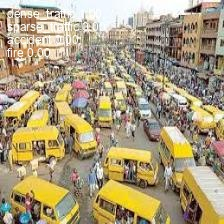

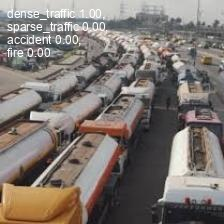

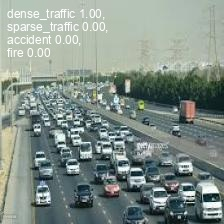

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Save and Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/classify/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [25]:
project.version(dataset.version).deploy(model_type="yolov8-cls", model_path=f"{HOME}/runs/classify/train/")

Dependency ultralytics==8.0.196 is required but found version=8.1.47, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: n


SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.


In [26]:
!zip -r runs.zip runs/

from google.colab import files
files.download("/content/runs.zip")

  adding: runs/ (stored 0%)
  adding: runs/classify/ (stored 0%)
  adding: runs/classify/train/ (stored 0%)
  adding: runs/classify/train/events.out.tfevents.1713251193.abe732231387.2528.0 (deflated 93%)
  adding: runs/classify/train/train_batch2.jpg (deflated 4%)
  adding: runs/classify/train/results.csv (deflated 80%)
  adding: runs/classify/train/weights/ (stored 0%)
  adding: runs/classify/train/weights/last.pt (deflated 8%)
  adding: runs/classify/train/weights/best.pt (deflated 8%)
  adding: runs/classify/train/train_batch1.jpg (deflated 3%)
  adding: runs/classify/train/args.yaml (deflated 52%)
  adding: runs/classify/train/train_batch0.jpg (deflated 3%)
  adding: runs/classify/predict/ (stored 0%)
  adding: runs/classify/predict/images_342_jpg.rf.6ee18e1ad3ba90d8270f563365316fd6.jpg (deflated 5%)
  adding: runs/classify/predict/images_044-2-_jpg.rf.f1457a548aa95d9be7b9bb8331700b12.jpg (deflated 4%)
  adding: runs/classify/predict/images_699_jpg.rf.62b577e0f9533fec38284aca97140c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>